# Stochastic Model 01: Matice přechodů (Transition matrix)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy
#%pip install seaborn matplotlib

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Definice modelových parametrů

In [3]:
# nastavení formátu výpisu pro zobrazení až 8 desetinných míst.
np.set_printoptions(precision=8, suppress=True)

# Definice průměrných dob trvání jednotlivých stavů systému a intenzit přechodu do neprovozních stavů na základě experimentálních dat
dt = 1  # časový krok (s)

# prumerne doby trvani (s)
T = {
    "S1": 2, "S2": 2, "S3": 5, "S4": 2,
    "S5": 5, "S6": 7, "S7": 3, "S8": 6,
    "S9": 60, "S10": 70, "S11": 160, "S12": 20
}


# intenzity poruch (1/s)
lambda_vals = {
    "S9": 4/8896,
    "S10": 7/8896,
    "S11": 3/8896,
    "S12": 13/8896
}

In [4]:
# Inicializace přechodové matice Markovského řetězce
states = list(T.keys())
n = len(states)

P = np.zeros((n,n))

### Pomocne funkce

In [5]:
def exit_probability(Ti):
    return 1 - np.exp(-dt / Ti)

def fault_probability(lam):
    return 1 - np.exp(-lam * dt)

### Definice prechodu

In [6]:
transitions = {
    "S1": ["S2", "S9", "S11"],
    "S2": ["S3", "S9", "S11"],
    "S3": ["S4", "S9", "S10", "S11"],
    "S4": ["S5", "S9", "S11"],
    "S5": ["S6", "S9", "S10", "S11", "S12"],
    "S6": ["S7", "S9", "S11"],
    "S7": ["S8", "S9", "S10", "S11"],
    "S8": ["S1", "S9", "S11"],
    "S9": ["S1"],
    "S10": ["S3"],
    "S11": ["S1"],
    "S12": ["S5"]
}

### Sestaveni matice

In [7]:
for i, si in enumerate(states):

    p_exit = exit_probability(T[si])
    total_fault_prob = 0

    # poruchove prechody
    for sj in transitions[si]:
        if sj in lambda_vals:
            total_fault_prob += fault_probability(lambda_vals[sj])

    # rozdeleni pravdepodobnosti
    for sj in transitions[si]:
        j = states.index(sj)

        if sj in lambda_vals:
            P[i, j] = fault_probability(lambda_vals[sj])
        else:
            P[i, j] = p_exit

    # pravdepodobnost setrvani
    P[i, i] = 1 - P[i].sum()

### Kontrola matice

In [8]:
print("Soucty radku:", P.sum(axis=1))

print("Prechodova matice P:")
print(np.round(P, 8))

Soucty radku: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Prechodova matice P:
[[0.60574395 0.39346934 0.         0.         0.         0.
  0.         0.         0.00044954 0.         0.00033717 0.        ]
 [0.         0.60574395 0.39346934 0.         0.         0.
  0.         0.         0.00044954 0.         0.00033717 0.        ]
 [0.         0.         0.81715748 0.18126925 0.         0.
  0.         0.         0.00044954 0.00078656 0.00033717 0.        ]
 [0.         0.         0.         0.60574395 0.39346934 0.
  0.         0.         0.00044954 0.         0.00033717 0.        ]
 [0.         0.         0.         0.         0.81569722 0.18126925
  0.         0.         0.00044954 0.00078656 0.00033717 0.00146026]
 [0.         0.         0.         0.         0.         0.86609119
  0.1331221  0.         0.00044954 0.         0.00033717 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.71495804 0.28346869 0.00044954 0.00078656 0.00033717 0.        ]
 [0.1535

### Výpočet stacionárního rozdělení

In [9]:
# Výpočet stacionárního rozdělení pravděpodobností pomocí vlastního řešení matice.
eigvals, eigvecs = np.linalg.eig(P.T)

idx = np.argmin(np.abs(eigvals-1))

pi = eigvecs[:,idx]
pi = np.real(pi / np.sum(pi))

print("\nStacionární rozdělení pi:")
print(np.round(pi,6))


Stacionární rozdělení pi:
[0.064078 0.06395  0.139183 0.063993 0.13771  0.186414 0.08706  0.159936
 0.024541 0.020182 0.048831 0.004123]


### Vyhodnocení dostupnosti systému

In [10]:
# Stanovení dlouhodobé provozní dostupnosti systému
availability = np.sum(pi[0:8])
print("\nDostupnost systému:")
print(round(availability,4))

# Stanovení podílu neprovozního času
downtime = np.sum(pi[8:12])
print("\nPodíl neprovozního času:")
print(round(downtime,4))


Dostupnost systému:
0.9023

Podíl neprovozního času:
0.0977


### Export matice formátu CSV

In [11]:
states = [
    "S1","S2","S3","S4","S5","S6","S7","S8",
    "S9","S10","S11","S12"
]

df = pd.DataFrame(P, index=states, columns=states)

In [12]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
S1,0.605744,0.393469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000450,0.000000,0.000337,0.000000
S2,0.000000,0.605744,0.393469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000450,0.000000,0.000337,0.000000
S3,0.000000,0.000000,0.817157,0.181269,0.000000,0.000000,0.000000,0.000000,0.000450,0.000787,0.000337,0.000000
S4,0.000000,0.000000,0.000000,0.605744,0.393469,0.000000,0.000000,0.000000,0.000450,0.000000,0.000337,0.000000
S5,0.000000,0.000000,0.000000,0.000000,0.815697,0.181269,0.000000,0.000000,0.000450,0.000787,0.000337,0.001460
S6,0.000000,0.000000,0.000000,0.000000,0.000000,0.866091,0.133122,0.000000,0.000450,0.000000,0.000337,0.000000
S7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714958,0.283469,0.000450,0.000787,0.000337,0.000000
S8,0.153518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845695,0.000450,0.000000,0.000337,0.000000
S9,0.016529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.983471,0.000000,0.000000,0.000000
S10,0.000000,0.000000,0.014184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.985816,0.000000,0.000000


### Vykreslení heatmapy

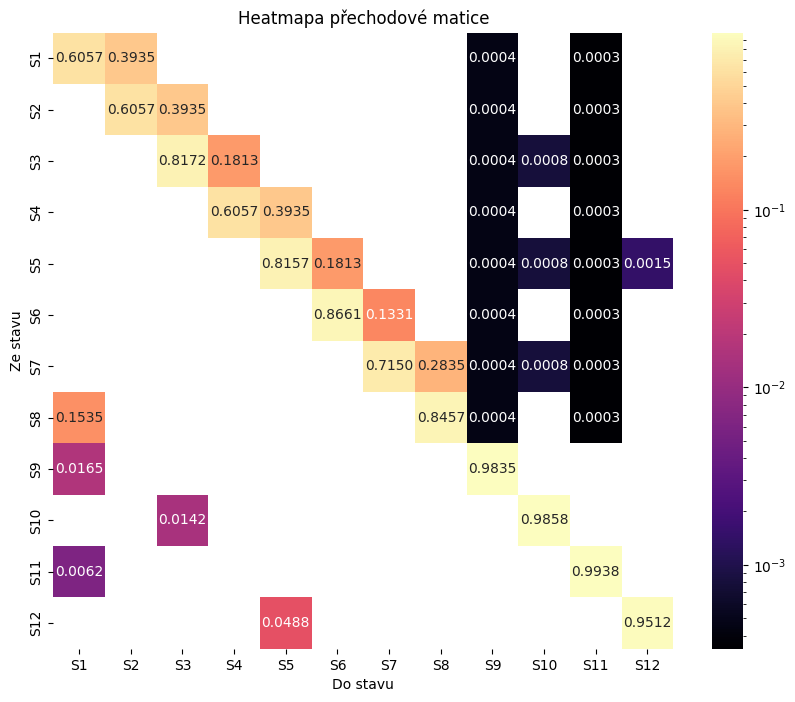

In [13]:
plt.figure(figsize=(10,8))

sns.heatmap(
    df,
    annot=True,
    fmt=".4f",
    cmap="magma",
    norm=plt.matplotlib.colors.LogNorm()
)

plt.title("Heatmapa přechodové matice")
plt.xlabel("Do stavu")
plt.ylabel("Ze stavu")
plt.show()

In [14]:
df.to_csv('../../data/03_StochModel/transition_matrix.csv', index=False)

Zdroj: vlastní implementace na základě [Stewart, 2009]
* Stewart, W.J. (2009). Probability, Markov Chains, Queues, and Simulation. Princeton University Press.
*  Norris, J.R. (1998). Markov Chains. Cambridge University Press.

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-25 | 1.1 | Vjačeslav Usmanov| added SM_01_Transition_matrix.ipynb |
| 2026-02-15 | 1.2 | Vjačeslav Usmanov| changed SM_01_Transition_matrix.ipynb |